<a href="https://colab.research.google.com/github/youse0ng/AICE_/blob/main/AICE_06_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터 전처리는 데이터 분석을 위해 데이터를 준비하는 모든 작업을 아울러 이르는 말

데이터 탐색, 결측치와 이상치의 확인과 처리, 데이터의 변환에 이르는 모든 단계를 전처리라고 부름


# 수치형 데이터 정제하기

## 결측치 파악하기

결측치(null)이란 데이터에 값이 없는 것을 의미

파이썬에서는 NaN으로 표기

파이썬에서 결측치를 확인하는 방법에는

1. Null이 아닌 수를 확인하는 방법

2. Null이 몇 개인지 확인하는 방법

2가지가 있다.



In [ ]:
import pandas as pd

df=pd.read_csv("/content/Clean_Dataset.csv")

df.drop([df.columns[0]],axis=1,inplace=True)

df

In [ ]:
# 랜덤하게 결측치 생성하기
# 랜던과 넘파이 불러오기

import numpy as np
import random

# 같은 결과 출력을 위한 시드 고정하기

random.seed(2023)
np.random.seed(2023)

# 랜덤한 위치에 결측치 5,000개를 포함한 데이터 df_na 생성하기 (5000개의 결측치 생성)

df_na=df.copy()
for i in range(5000):
  df_na.iloc[random.randint(0,len(df_na.index)-1),random.randint(0,len(df_na.columns)-1)]=np.nan

In [ ]:
len(df_na.index),len(df_na.columns)

In [ ]:
df_na.iloc[1]=np.nan # 2행
df_na.iloc[3]=np.nan # 4행의 인덱스 전체 결측치 처리하기

#### 결측치 존재 여부 확인

info() 메소드를 이용하면 인덱스의 범위(RangeIndex), 칼럼 정보(data columns), 칼럼 수, 칼럼명, 칼럼별 non_null수, 칼럼의 데이터 유형 등

데이터프레임의 많은 정보를 확인

In [ ]:
df_na.info()

airline 항목을 보면, 300153-299685 = 468 개의 결측치가 있다.

단순히 결측치가 있는지 없는지만 파악하자. info()



### 결측치 수 확인하기

isnull()

조금 더 직관적으로 df_na 데이터프레임의 결측치 개수를 확인해보자

isnull 메소드를 사용할 경우 null 값이면 True

null이 아니면 False를 반환한다.

즉, 결측치의 개수를 반환

In [ ]:
df_na

In [ ]:
df_na.isnull().sum(axis=0)

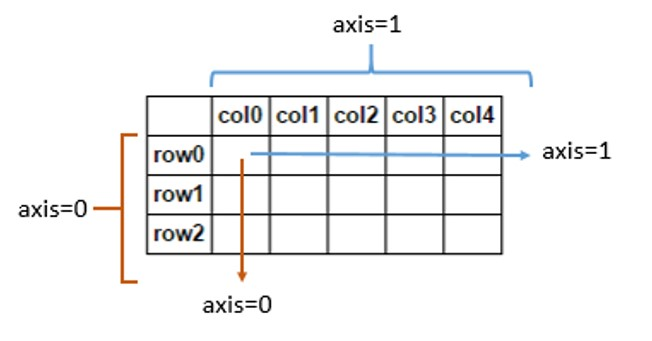

## 결측치 처리하기

결측치는 데이터를 분석할 때 반드시 처리해야 하는 값

결측치 처리하는 방식에는 3가지 방법이 존재

- 1. 결측치가 포함된 레코드를 제거하는 방법
- 2. 결측치가 포함된 칼럼을 제거하는 방법
- 3. 결측치를 특정한 값으로 채워넣는 방법



In [ ]:
# 데이터 변경에 대비하여 원본 데이터 복사하기

df_na_origin=df_na.copy()
df_na_origin

### 결측치 삭제하기 (`dropna()`)



결측치 삭제는 손쉽게 결측치를 처리할 수 있는 방법이지만, 데이터의 손실이 발생하여 원래 데이터 특성을 모두 반영하기 못하는 문제가 발생

결측치의 비중이 적을 때 사용하는 것이 좋다.

`dropna()` 메소드를 사용하면 데이터의 행 기준으로 각 칼럼 값에 결측값이 1개라도 있으면 해당 행을 삭제

데이터 손실이 크기 때문에 how와 thresh 파라미터가 존재

- how : default:'any' 를 'all'로 바꾸면 모든 칼럼이 결측이인 행만 삭제한다.

- thresh: 결측치가 아닌 칼럼의 수를 보장한다. 예를 들어 11개의 칼럼이 있는 데이터에서 thresh가 8인 경우, 결측치가 아닌 값이 8개 미만인 경우,
즉 결측치가 4개 이상인 행 데이터를 삭제한다.

In [ ]:
# 결측치 1개라도 가지는 행을 모두 삭제하기
df_na=df_na.dropna()
df_na.info()

In [ ]:
# 결측치 삭제하기 전 원래 데이터 가져오기
df_na=df_na_origin.copy()

# 모든 데이터가 결측치인 행만 삭제하기
df_na=df_na.dropna(how='all')
df_na.info()

300153개 였던 데이터가 300151로 2개의 행이 삭제됨

In [ ]:
# 0번 인덱스부터 5개의 데이터를 불러와서 1번 3번 인덱스 삭제 결과 확인

df_na.head()

### 칼럼 제거하기 drop

칼럼 제거는 단일 특성에서 일정 비중 이상을 결측치가 차지하는 경우에만 사용하는 것이 좋다.

결측치의 비율이 50%가 넘어가면 삭제를 고려한다.

실습을 위해 환승장 수(stops)와 비행 코드(flight) 특성을 제거해보자.

In [ ]:
# 결측치 삭제하기 전 원래 데이터 가져오기
df_na=df_na_origin.copy()

# stops과 flight 특성 제거
df_na=df_na.drop(['stops','flight'],axis=1)
df_na.info()

In [ ]:
df_na.dropna(inplace=True)
df_na.info()

결측치 삭제하기 에서 dropna를 했을 때 보다 932개의 데이터가 보존되긴 했지만, 칼럼을 제거했을 때 데이터 손실이 발생하는 것을 감안하면

좋은 선택이라곤 볼 수 없지만, 일정 비율 이상의 결측치가 존재하는 칼럼은 칼럼 제거를 고려해 볼 수 있다.

### 결측치 대체하기 `fillna()`

method 파라미터
*   1. ffill 이전 인덱스에 있는 값을 사용해서 결측치를 채움
*   2. bfill 다음 인덱스에 있는 값을 사용해서 결측치를 채움
가장 무난하고 많이 사용되는 방법


평균값, 중간값, 최빈값을 가장 많이 사용하지만, 어떤 값을 사용해도 정확한 값과는 같지는 않기 때문에 데이터의 오차가 발생할 수 있다.

또한 너무 많이 데이터를 같은 값으로 대체하면 데이터의 편향이 발생할 수 있다.

모든 결측치를 평균값으로 대체하는 실습을 하자

`fillna` 메소드의 파라미터에 지정하는 값으로 결측치가 대체된다.

숫자형 문자형 데이터 모두 사용 가능!



In [ ]:
df_na=df_na_origin.copy()

# 칼럼별 평균값으로 결측치 대체하기

df_na=df_na.fillna(df_na.mean())
df_na.head()

# 평균값으로 대체했기에, 문자 유형에는 대체하기가 적용되지않음
# duration daysleft price 에는 mean()이 적용되어들어감.

In [ ]:
df_na=df_na.fillna(method='bfill')
df_na.info()

## 이상치 파악하기

보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값을 이상치라 한다.

이러한 이상치는 데이터 분석 또는 AI 모델링할 경우 의사결정에 큰 영향을 미침

그래서 적절한 이상치 처리는 필수이다.

이상치를 탐지하기 위한 방법 몇가지를 알아보자.

1. 특정 추세를 벗어난 데이터는 시각화로 확인 산점도, 선형회귀 모델 그래프(lmplot)나 조인트그래프, 산점도가 포함된 그래프로 확인 가능

2. 중앙값을 크게 벗어난 데이터는 IQR로 이상치를 파악할 수 있다.
(상자 그래프)


### Z-score로 파악하기

제트스코어는 신뢰 구간과 관계가 있다.

신뢰 구간이란 모수가 실제로 포함될 것이라고 예측되는 범위

신뢰 구간에 모집단의 실제 평균값이 포함될 확률을 신뢰 수준이라고 한다.

일반적으로 95 % 의 신뢰 수준을 사용하기때문에 Z-Score 1.96을 기준으로 이상치를 확인해보자.

Z-score를 구하는 산식은 138p. 를 참조


In [ ]:
# Z-Score를 기준으로 신뢰 수준이 95%인 데이터를 확인하기

df[(abs((df['price']-df['price'].mean())/df['price'].std()))>1.96]

총 12493 개의 이상치가 검출됨.

신뢰도 95%는 일반적인 기준으로 실제 데이터의 특성에 맞게 신뢰 구간을 조정하면된다.


### IQR로 확인하기

IQR은 제3사분위수에서 제1사분위수를 뺀 값을 의미

제1사분위수에서 IQR의 1.5배만큼 뺀 값보다 작거나,

제3사분위수에서 IQR의 1.5배만큼 더한 값보다 크면,

이상치로 판단한다.

이상치를 판단하는 findOutlier 함수를 만들어보자

quantile 메소드는 데이터를 크기별로 줄 세운 후 해당하는 퍼센트에 따른 값으로 quantile(0.25)는 제1사분위수를 나타내고, quantile(0.75)는 제3사분위수를 나타낸다.

In [ ]:
# IQR을 기준으로 이상치를 확인하는 함수 만들기
def findOutliers(x,column):
  # 제1사분위수 q1구하기
  q1=x[column].quantile(0.25)

  # 제3사분위수 q3구하기
  q3=x[column].quantile(0.75)

  # IQR의 1.5배수 구하기
  iqr=1.5*(q3-q1)

  # 제3사분위수에서 IQR의 1.5배보다 크거나 제1사분위에서 IQR의 1.5배보다 작은 값만 저장한 데이터 y 만들기
  y=x[(x[column]>(q3+iqr)) | (x[column]<(q1-iqr))]

  # IQR 기준 이상치 개수 반환
  return len(y)

In [ ]:
# price,duration,days_left에 대하여 IQR 기준 이상치 개수 확인하기
print("price IQR Outliers: ",findOutliers(df,'price') ,'개')
print("duration IQR Outliers: ", findOutliers(df,'duration'),'개')
print("days_left IQR Outliers: ", findOutliers(df,'days_left'),'개')

In [ ]:
import matplotlib.pyplot as plt

plt.figure()

# 첫 번째 subplot: 1행 5열로 나눈 영역에서 첫 번째 영역
plt.subplot(151)
df[['duration']].boxplot()
plt.ylabel("time")

# 두 번째 subplot: 1행 5열로 나눈 영역에서 세 번째 영역
plt.subplot(153)
df[['days_left']].boxplot()
plt.ylabel("days")
# 세 번째 subplot: 1행 5열로 나눈 영역에서 다섯 번째 영역
plt.subplot(155)
df[['price']].boxplot()
plt.ylabel("days")
plt.show()

실행 결과에서 비행시간(duration)과 항공권 가격(price)에 이상치가 있음을 확인할 수 있다.

## 이상치 처리하기

이상치는 결측치와 같이 삭제할 수도 있고, 데이터 보존을 위해 대체할 수도 있습니다.

삭제하기는 데이터의 손실을 감안해야 하고, 대체하기는 데이터의 통계량이 변경되는 것을 고려해 이상치를 처리하면 됩니다.


In [ ]:
# 데이터 변형에 대비하여 데이터 원본 복사하기
df_origin=df.copy()

### 이상치 데이터 삭제하기

Z-Score로 찾아낸 이상치를 제거하는 방법은 확인한 데이터프레임의 인덱스를 리스트로 만들어 실습용 데이터에서 제거하는 것



In [ ]:
outliers_from_price=df[abs((df['price']-df['price'].mean())/df['price'].std())>1.96].index
outliers_from_price

In [ ]:
outliers_from_duration=df[abs((df['duration']-df['duration'].mean())/df['duration'].std())>1.96].index
outliers_from_duration

In [ ]:
# 추출한 인덱스의 행 삭제해서 clean_df_from_price를 만들기 (price)

clean_df_from_price=df.drop(outliers_from_price)
clean_df_from_price.info()

# 추출한 인덱스의 행 삭제해서 clean_df_from_duration

clean_df_from_duration=df.drop(outliers_from_duration)
clean_df_from_duration.info()

In [ ]:
plt.figure(figsize=(16,8))

# duration에 있는 outlier가 제거됐는지 확인
plt.subplot(131)
clean_df_from_duration[['duration']].boxplot()

# price에 있는 outlier가 제거됐는지 확인
plt.subplot(133)
clean_df_from_price[['price']].boxplot()
plt.show()

### 이상치 데이터 대체하기

이상치를 IQR로 확인하고 처리하는 경우 함수를 만들어서 대체하거나 삭제해야한다.

IQR 하단에 있는 이상치는 최솟값으로 대체하고,

상단에 있는 이상치는 최댓값으로 대체하는 함수를 만들어 항공권 가격의 IQR 기준 이상치를 대체하여 처리해보자.

In [ ]:
# IQR 기준, 이상치를 대체하는 함수를 만들기

def changeOutliers(x,column):
  q1=x[column].quantile(0.25)
  q3=x[column].quantile(0.75)

  iqr=1.5*(q3-q1)

  min=(q1-iqr)
  max=q3+iqr

  x.loc[(x[column]>max),column]=max
  x.loc[(x[column]<min),column]=min

  return(x)

clean_df=changeOutliers(df,'price')
clean_df.info()

df.loc[행과 관련된 수식이나 Any, 열과 (칼럼과)관련된 것]        


In [ ]:
print("price IQR outliers: ",findOutliers(clean_df,'price'))

In [ ]:
clean_df[['price']].boxplot()
plt.show()

In [ ]:
clean_df[['price']]

## 구간화하기

구간화(binning)는 연속형 데이터를 특정 구간으로 나누어 범주형 또는 순위형으로 변환하는 방법을 말한다.

대표적으로 수능 점수를 등급으로 변환하거나, 나이를 세대로 나누는 것이 있다.

구간화하면 이상치로 발생 가능한 문제를 줄이고,

결과에 대한 해석이 쉬워질 수 있다.

1. 동일 길이로 구간화 (cut)

2. 동일 갯수로 구간화 (qcut)




### 동일 길이로 구간화하기

cut을 사용하여 구간을 사용자가 지정하여 구간화하기

파라미터
- bins: 구간화 지점을 리스트로 지정 예를들어, [A,B,C]로 지정했다면,
[A,B] [B,C]까지 2개로 구간화한다.

- labels: 구간화된 값의 이름을 지정한다. 구간화를 지정한 수만큼 리스트로 만들어넣으면된다. 즉, bins의 개수보다 1개 적게 지정



비행 시간(duration)을 사용하여 0부터 5시간은 단거리, 5부터 10시간은 중거리, 10시간 이상은 장거리로 구간화해보자.


In [ ]:
df['distance']=pd.cut(df['duration'],bins=[0,5,10,df['duration'].max()],labels=['short','medium','long'])

df[['distance']].head()

In [ ]:
# 빈도표를 알고싶을때, value_counts()
df['distance'].value_counts()

### 동일 갯수로 구간화하기

qcut은 cut과 사용이 동일합니다. 다만,bins 대신 정수를 넣어서 해당 구간만큼 동일한 양의 데이터가 들어가도록 구간화한다,

labels는 cut과 같이 구간화된 값의 이름을 지정한다.
항공권 가격 칼럼을 이용하여 가격을 4등급으로 구간화해보자.


In [ ]:
df['price_rate']=pd.qcut(df['price'],4,labels=['cheap','normal','expensive','too expensive'])
df.head()

In [ ]:
df['price_rate'].value_counts()

# 빈도수가 비슷비슷하다.


# 범주형 데이터 정제하기

데이터를 분석하여 통계를 만들 때 범주형 데이터를 전처리하는 것이 중요

예를 들어, 보통 남자, 여자의 구분을 (남,여) 혹은 (M,W)로 표기하지만 컴퓨터는 남자와 여자를 구분하지 못하므로 컴퓨터가 가장 이해하기 좋은 언어인 숫자로 남자는 0, 여자는 1과 같이 변경해 주어야한다.

컴퓨터가 데이터를 이해할 수 있도록 범주형 데이터를 수치형 데이터로 변경하는 과정을

**범주형 인코딩이라고 한다.**

### 레이블 인코딩하기

범주형 데이터에 숫자 레이블을 할당한다.

범주를 정렬하는 방법을 많이 사용하는데, 글자를 알파벳순으로 정렬한 후

그것을 기준으로 번호를 매긴다고 생각한다.

1. 가나다 순으로 정렬

  대전-> 부산 ->서울

2. 순서대로

  대전 - 0

  부산 - 1
  
  서울 - 2



#### 판다스에서 레이블 인코딩하기 (`Factorize`)

판다스만 사용하여 레이블을 인코딩할 수 있다.

다만, 알파벳순이 아닌 인덱스 기준으로, 카테고리가 등장하는 순서를 기반으로 숫자로 매핑해준다.

Factorize의 결과는 tuple 값을 반환하기 때문에,
데이터프레임의 새로운 칼럼을 만들기위해 array로 변경하고 reshape하여 새로운 칼럼으로 만들어준다.

In [ ]:
pd.factorize(df['airline'])[0].reshape(-1,1)

https://yganalyst.github.io/data_handling/memo_5/

reshape에 관한 인수 설명

In [ ]:
df=df_origin.copy()

# factorize로 airline 칼럼 레이블 인코딩하기
df['label_encoding']=pd.factorize(df['airline'])[0].reshape(-1,1)
df.head()

In [ ]:
# airline 칼럼과 새롭게 만들어진 label_encoding 칼럼의 빈도표 확인하기
print(df['airline'].value_counts())
print(df['label_encoding'].value_counts())

#### 사이킷런으로 레이블 인코딩하기(sklearn.preprocessing.LabelEncoder)

sklearn.preprocessing 안에는 데이터 전처리를 위한 다양한 모듈이 존재한다.

LabelEncoder 함수를 활용하여 간단하게 레이블 인코딩을 할 수 있다.

le=LabelEncoer() 선언후

le.fit_transform(인코딩을 원하는 칼럼)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder로 airline 칼럼 레이블 인코딩하기
le=LabelEncoder()

df['airline_Label_Encoder']=le.fit_transform(df['airline'])

df.head()

In [ ]:
le.fit_transform(df['airline']).reshape(-1,1) # reshape(변경할 차원,차원)

In [ ]:
# airline 칼럼과 새롭게 만들어진 airline_Label_Encoder 칼럼의 빈도표 확인하기

print(df['airline'].value_counts()) # airline 칼럼의 빈도표 확인하기
print(df['airline_Label_Encoder'].value_counts()) # airline_Label_Encoder 칼럼의 빈도표 확인하기

In [ ]:
# 레이블 인코딩 역변환 (디코딩)하기

le.inverse_transform(df['airline_Label_Encoder']).reshape(-1,1)

### 원핫 인코딩하기

1개의 요소는 True, 나머지 요소는 False로 만들어주는 기법

간단히 말하면 하나의 데이터만 1 나머지는 0으로 만들어주는 기법이다.

자세한 것은 보면서 얘기




#### 판다스에서 원핫 인코딩하기 (`pd.get_dummies(하고자하는 칼럼명)`)

In [ ]:
df=df_origin.copy()

# class 칼럼을 원핫 인코딩하기
pd.get_dummies(df['class'])

df=pd.get_dummies(df,columns=['class'])
df.head()

class 칼럼이 사라지고, class_Business와 class_Economy라는 새로운 칼럼이 데이터프레임에 추가됨

#### 사이킷런으로 원핫 인코딩하기 (OneHotEncoder)

from sklearn.preprocessing import OneHotEncoder

사이킷런에서도 원핫인코더(OneHotEncoder) 모듈을 제공한다.

get_dummies와 같이 바로 데이터프레임에는 반영할 수 없어 원핫 인코딩 후 데이터를 추가하기 위해 칼럼을 만들고 추가하는 작업이 필요하다.

In [ ]:
df=df_origin.copy()

from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder로 인코딩하기
oh=OneHotEncoder()
encoder=oh.fit_transform(df['class'].values.reshape(-1,1)).toarray()

# 원핫 인코딩 결과를 데이터프레임으로 만들기
df_OneHot=pd.DataFrame(encoder,columns=["class_"+str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])

# 원본데이터와 df_OneHot 합치기
df1=pd.concat(objs=[df,df_OneHot],axis=1)
df1

## 스케일링하기

각 칼럼에 들어 있는 데이터의 상대적 크기에 따라 분석 결과와 모델링 결과가 달라질 수 있습니다.

0부터 1000까지 값을 가지는 칼럼 A와 0부터 10까지 값을 가지는 칼럼 B를 가지고 분석을 수행하면, 각 컴퓨터는 각 칼럼이 무엇을 의미하는지 모르기에,
대체로 큰 값을 가지는 칼럼 A의 영향을 더 크게 반영한다.

이를 Scailing 이라한다.




### 정규화하기

min-max Scailing은 데이터의 범위를 0~1사이로 변환하여 데이터 분포를 조정하는 가장 일반적인 정규화기법이다.

최소-최대 정규화 수식

xstd=(x값-x의최소값)/(x의 최댓값-x의 최소값)



In [ ]:
df=df_origin.copy()

# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num=df[['duration','days_left','price']]

# 정규화 수식 적용
df_num=(df_num-df_num.min())/(df_num.max()-df_num.min())
df_num.head()

df.drop(columns=['duration','days_left','price'],inplace=True)
df=pd.concat([df,df_num],axis=1)
df.head()

In [ ]:
df_num.describe()

값을 보면 min이 0, max가 1인 값으로 정규화가 되었습니다.

min-max Scailing 극단적인 이상치에 민감하니 유의해서 사용하고

**이상치를 먼저 제거하고 정규화를 진행해야한다.**

### 표준화하기

수치형 데이터를 평균이 0이고, 표준편차가 1인 표준 정규분포로 변환한다.

산식은 다음과 같다.

Xnorm=(xi-X의 평균)/(x의 표준편차)

In [ ]:
# 수치형 데이터만 분리하여 데이터프레임 만들기
df_num=df[['duration','days_left','price']]

# 표준화 수식 적용하기
df_num=(df_num-df_num.mean())/df_num.std()
df_num.head()

In [ ]:
df_num.describe()

In [ ]:
df.head()

In [ ]:
df_num.head()

In [ ]:
# iloc을 통해서 df_num 데이터프레임의 value를 df에다가 적용하기
df.iloc[:,[8,9,10]]=df_num[['duration','days_left','price']]
df.head(n=10)

# 변수 선택하기

## 신규 변수 생성하기

### 하나의 데이터로 여러 개의 새로운 칼럼 만들기

보토 항공기의 기체명은 '항공기 제조사+ 모델명' 으로 만들어진다.

이를 활용해서 flight 칼럼을 제조사와 모델명으로 분리하여 2개의 새로운 칼럼을 만들어보자.

apply, lambda를 사용한다

lambda는 이름이 없는 함수로 간결할 뿐만 아니라 메모리를 절약하는 효과도 있다.



*args (arguments)

**kwargs
에 관한 source
https://s1mcoding.tistory.com/41#:~:text=%EC%9D%BC%EB%8B%A8%20%2Aargs%EC%97%90%20%EB%8C%80%ED%95%B4%20%EB%A8%BC%EC%A0%80%20%EC%84%A4%EB%AA%85%EC%9D%84%20%ED%95%98%EC%9E%90%EB%A9%B4%2C%20%2Aargs%EB%8A%94%20%EC%9D%BC%EB%8B%A8,%EB%AA%87%20%EA%B0%9C%20%EB%B0%9B%EC%95%84%EC%95%BC%20%ED%95%A0%EC%A7%80%20%EB%AA%A8%EB%A5%B4%EB%8A%94%20%EA%B2%BD%EC%9A%B0%20%EC%9E%85%EB%A0%A5%ED%95%B4%EB%91%90%EB%8A%94%20%EB%B3%80%EC%88%98%EC%9D%B4%EB%8B%A4.



zip 함수에 관한 자료

https://www.daleseo.com/python-zip/

lambda 에 관한 자료
  https://blog.naver.com/gyeongbly_park/222024203170

filter,reduce,map에 관한 자료
  https://blog.naver.com/gyeongbly_park/222024296047

apply 함수에 관한 자료
  https://m.blog.naver.com/jinnie1210/222682165324

In [ ]:
# 항공기 기종을 제조사 코드와 모델명으로 분리하는 split_flight 함수 만들기
def split_flight(flight):
  # "-" 문자를 기준으로 앞쪽을 제조사명 코드로 저장
  manufacture=flight.split("-")[0]

  # "-" 문자를 기준으로 뒷쪽을 모델명으로 저장
  model=flight.split("-")[1]

  # 제조사 코드와 모델명 리턴
  return manufacture,model

# df['flight']를 split_flight 함수의 파라미터로 넣어 실행하는 lambda,apply를 적용하여 제조사 코드와 모델명 반환
df['manufacture'],df['model']=zip(*df['flight'].apply(lambda x: split_flight(x)))
df.head()

In [ ]:
df['flight'].apply(lambda x: split_flight(x))

`zip(*args)`
zip으로 묶었던 args를 다시 unpacking 해서 a,b에다가 저장함

zip(*...)을 사용하면 이렇게 묶인 요소들을 다시 개별 시퀀스로 풀어낼 수 있습니다.

 unzipped_list1은 (1, 2, 3)이 되고, unzipped_list2는 ('a', 'b', 'c')가 됩니다. 즉, zip(*...)를 사용하여 zip 객체에서 묶여있던 요소들을 다시 원래의 시퀀스로 분리할 수 있습니다.







In [ ]:
a,b=zip(*df['flight'].apply(lambda x: split_flight(x)))
a,b

## 변수 선택하기(Feature selection)

특성 선택이라고도 하고, 사용가능한 변수 중 모델 훈련에 가장 효과적인 특성의 부분집합을 선택하여 학습 모델을 구축하는 과정이다.

변수 선택의 목적은
1. 학습에 선택하는 특징의 수는 줄이면서 모델의 예측 능력을 유지하는 것
2. 또한 과적합을 방지하고 모델의 해석 가능성을 향상합니다.

변수를 선택하는 방법은 문제 유형, 데이터, 학습 알고리즘에 따라 달라져야 한다.

여기에서는 변수 선택 방법 3가지를 간단히 소개한다.



In [ ]:
1. RFE(Recursive Feature Elimination)

2. RFE-CV

3. UFS

In [ ]:
import numpy as np

# 7x7 크기의 3D 배열 생성 및 초기화
array_3d = np.zeros((7, 7, 25))

# 배열 출력
print(array_3d)
print(f"배열의 shape는 {array_3d.shape} 입니다.")